In [48]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans serif'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.transparent'] = True

In [33]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'report':
        width_pt = 442.65375
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

<Figure size 576x432 with 0 Axes>

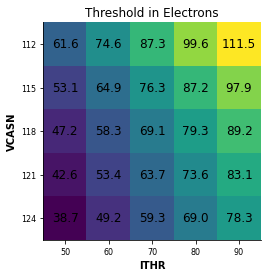

In [50]:

VCASN = ['112', '115', '118', '121', '124']
ITHR = ['50', '60', '70', '80', '90']
threshold = np.array([[61.6, 53.1, 47.2, 42.6, 38.7], [74.6, 64.9, 58.3, 53.4, 49.2], [87.3, 76.3, 69.1, 63.7, 59.3], [99.6, 87.2, 79.3, 73.6,69.0], [111.5, 97.9, 89.2, 83.1,78.3]])
threshold=threshold.transpose()

fig = plt.figure(figsize=(8,6))

fig, ax = plt.subplots()
ax.imshow(threshold)

for (i, j), z in np.ndenumerate(threshold):
    ax.text(j, i, '{}'.format(z), ha='center', va='center', size=12)

plt.title("Threshold in Electrons")
plt.xlabel("ITHR")
plt.ylabel("VCASN")
plt.xticks(np.arange(len(ITHR)), ITHR)
plt.yticks(np.arange(len(VCASN)), VCASN)
#plt.savefig('threshold.png')
#files.download("threshold.png") 
plt.savefig('threshold.pdf')
#files.download("threshold.pdf") 

<Figure size 576x432 with 0 Axes>

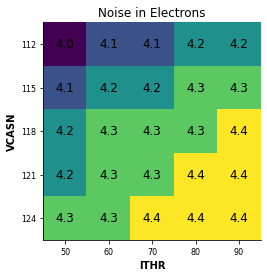

In [51]:
noise = np.array([[4.0, 4.1, 4.2, 4.2,4.3], [4.1, 4.2, 4.3, 4.3,4.3], [4.1, 4.2, 4.3, 4.3, 4.4], [4.2, 4.3, 4.3, 4.4, 4.4], [4.2, 4.3, 4.4, 4.4,4.4]])
noise = noise.transpose()

fig = plt.figure(figsize=(8,6))

fig, ax = plt.subplots()
ax.imshow(noise)

for (i, j), z in np.ndenumerate(noise):
    ax.text(j, i, '{}'.format(z), ha='center', va='center', size=12)

plt.title("Noise in Electrons")
plt.xticks(np.arange(len(ITHR)), ITHR)
plt.yticks(np.arange(len(VCASN)), VCASN)
plt.xlabel("ITHR")
plt.ylabel("VCASN")
#plt.savefig('noise.png')
#files.download("noise.png") 
plt.savefig('noise.pdf')
#files.download("noise.pdf") 

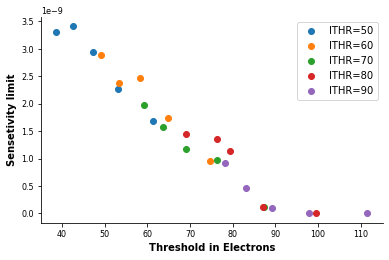

In [49]:
# plot for Threshold in Electrons

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.use('TkAgg')

fig, ax = plt.subplots(1,1, figsize=set_size("report"))
maskes = np.array([0, 0, 0, 1, 0, 0, 1])
x1 = np.array([61.3, 53.1, 47.2, 47.2, 42.6, 38.7, 38.7])
y1 = np.array([1.68e-09, 2.27e-09, 2.94e-09, 3.81e-11, 3.41e-09, 3.30e-09, 9.54e-11])
mx1= np.ma.masked_array(x1, mask=maskes)
my1= np.ma.masked_array(y1, mask=maskes)
ax.scatter(mx1, my1, label="ITHR=50")
#ax.scatter(np.ma.masked_array(x1, mask=((maskes-1)*-1)), np.ma.masked_array(y1, mask=((maskes-1)*-1)), color='grey', label="ITHR=50 (masked)")

x2 = np.array([74.6, 64.9, 58.3, 53.4, 49.2])
y2 = np.array([9.54e-10, 1.74e-09, 2.46e-09, 2.37e-09, 2.88e-09])
ax.scatter(x2, y2, label="ITHR=60")

x3 = np.array([87.3, 76.3,  69.1,  63.7,  59.3])
y3 = np.array([1.14e-10, 9.73e-10, 1.18e-09, 1.58e-09, 1.98e-09])
ax.scatter(x3, y3, label="ITHR=70")

x4 = np.array([99.6, 87.2,  79.3,  76.3,  69])
y4 = np.array([0, 1.14e-10, 1.14e-09, 1.35e-09, 1.45e-09])
ax.scatter(x4, y4, label="ITHR=80")

x5 = np.array([111.5, 97.9,  89.2,  83.1,  78.3])
y5 = np.array([0, 0, 9.54e-11, 4.58e-10, 9.16e-10])
ax.scatter(x5, y5, label="ITHR=90")

ax.set_xlabel('Threshold in Electrons')
ax.set_ylabel('Sensetivity limit')
ax.legend()
fig.savefig('Sensitivity_trh.pdf', bbox_inches='tight')
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()



In [ ]:
# script for hitmap



filenames50_112='/home/alpide-cali/Alpide-test-results/test_fhr/50/fhrscan-20220608_163632.raw'
filenames50_115='/home/alpide-cali/Alpide-test-results/test_fhr/50/fhrscan-20220608_163641.raw'
filenames50_118='/home/alpide-cali/Alpide-test-results/test_fhr/50/fhrscan-20220608_163649.raw'
filenames50_121='/home/alpide-cali/Alpide-test-results/test_fhr/50/fhrscan-20220608_163658.raw'
filenames50_124='/home/alpide-cali/Alpide-test-results/test_fhr/50/fhrscan-20220608_163706.raw'

filenames60_112='/home/alpide-cali/Alpide-test-results/test_fhr/60/fhrscan-20220608_163715.raw'
filenames60_115='/home/alpide-cali/Alpide-test-results/test_fhr/60/fhrscan-20220608_163723.raw'
filenames60_118='/home/alpide-cali/Alpide-test-results/test_fhr/60/fhrscan-20220608_163732.raw'
filenames60_121='/home/alpide-cali/Alpide-test-results/test_fhr/60/fhrscan-20220608_163740.raw'
filenames60_124='/home/alpide-cali/Alpide-test-results/test_fhr/60/fhrscan-20220608_163749.raw'

filenames70_112='/home/alpide-cali/Alpide-test-results/test_fhr/70/fhrscan-20220608_163757.raw'
filenames70_115='/home/alpide-cali/Alpide-test-results/test_fhr/70/fhrscan-20220608_163805.raw'
filenames70_118='/home/alpide-cali/Alpide-test-results/test_fhr/70/fhrscan-20220608_163814.raw'
filenames70_121='/home/alpide-cali/Alpide-test-results/test_fhr/70/fhrscan-20220608_163822.raw'
filenames70_124='/home/alpide-cali/Alpide-test-results/test_fhr/70/fhrscan-20220608_163831.raw'

filenames80_112='/home/alpide-cali/Alpide-test-results/test_fhr/80/fhrscan-20220608_163839.raw'
filenames80_115='/home/alpide-cali/Alpide-test-results/test_fhr/80/fhrscan-20220608_163848.raw'
filenames80_118='/home/alpide-cali/Alpide-test-results/test_fhr/80/fhrscan-20220608_163856.raw'
filenames80_121='/home/alpide-cali/Alpide-test-results/test_fhr/80/fhrscan-20220608_163905.raw'
filenames80_124='/home/alpide-cali/Alpide-test-results/test_fhr/80/fhrscan-20220608_163913.raw'

filenames90_112='/home/alpide-cali/Alpide-test-results/test_fhr/90/fhrscan-20220608_163921.raw'
filenames90_115='/home/alpide-cali/Alpide-test-results/test_fhr/90/fhrscan-20220608_163930.raw'
filenames90_118='/home/alpide-cali/Alpide-test-results/test_fhr/90/fhrscan-20220608_163938.raw'
filenames90_121='/home/alpide-cali/Alpide-test-results/test_fhr/90/fhrscan-20220608_163947.raw'
filenames90_124='/home/alpide-cali/Alpide-test-results/test_fhr/90/fhrscan-20220608_163955.raw'

for eachfile in $filenames50_112
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames50_115
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames50_118
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames50_121
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames50_124
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames60_112
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames60_115
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames60_118
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames60_121
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames60_124
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames70_112
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames70_115
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames70_118
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames70_121
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames70_124
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames80_112
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames80_115
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done


for eachfile in $filenames80_118
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done


for eachfile in $filenames80_121
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames80_124
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames90_112
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done

for eachfile in $filenames90_115
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done


for eachfile in $filenames90_118
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done


for eachfile in $filenames90_121
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done


for eachfile in $filenames90_124
do
    nameWOextension="${eachfile%.*}"
    echo $nameWOextension
    /home/alpide-cali/alpide-daq-software/analyses/hitmap.py  $nameWOextension'.raw' --path /home/alpide-cali/Alpide-test-results/test_hitmap --dump-acc-hits


done






In [ ]:
# script for Fhr


cd /home/alpide-cali/Alpide-test-results
mkdir test_fhr
for i in 50 60 70 80 90;
do
	mkdir $i
	cd $i
    /home/alpide-cali/alpide-daq-software/scans/fhr.py --path /home/alpide-cali/Alpide-test-results/test_fhr/$i --vcasn 112 --vcasn2 124 --vclip 60 --ithr $i
	/home/alpide-cali/alpide-daq-software/scans/fhr.py --path /home/alpide-cali/Alpide-test-results/test_fhr/$i --vcasn 115 --vcasn2 127 --vclip 60 --ithr $i
	/home/alpide-cali/alpide-daq-software/scans/fhr.py --path /home/alpide-cali/Alpide-test-results/test_fhr/$i --vcasn 118 --vcasn2 130 --vclip 60 --ithr $i
	/home/alpide-cali/alpide-daq-software/scans/fhr.py --path /home/alpide-cali/Alpide-test-results/test_fhr/$i --vcasn 121 --vcasn2 133 --vclip 60 --ithr $i
	/home/alpide-cali/alpide-daq-software/scans/fhr.py --path /home/alpide-cali/Alpide-test-results/test_fhr/$i --vcasn 124 --vcasn2 136 --vclip 60 --ithr $i

done
